In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Load data

In [2]:
# Load csv as dataframe
df_scores = pd.read_csv('./datasets/scores.csv')

In [3]:
# Check strucutre
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  101 non-null    float64
 1   score        101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
# See end of dataset
df_scores.tail(10)

,study_hours,score
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### (EDA) Exploratory data analysis

In [5]:
# Statistics mesuares of variables
df_scores.describe()

,study_hours,score
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='study_hours', ylabel='score'>

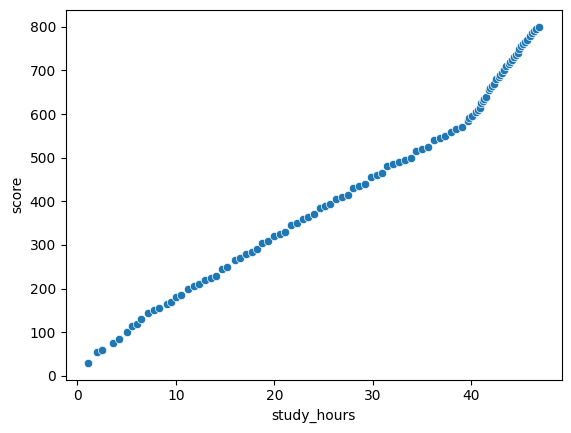

In [6]:
# Dispersion Plot (see how these variables are realated in a cartesian plan)
# X = study_hourd (independent variable)
# y = score (dependent variable)

sns.scatterplot(data=df_scores, x='study_hours', y='score')

<Axes: ylabel='study_hours'>

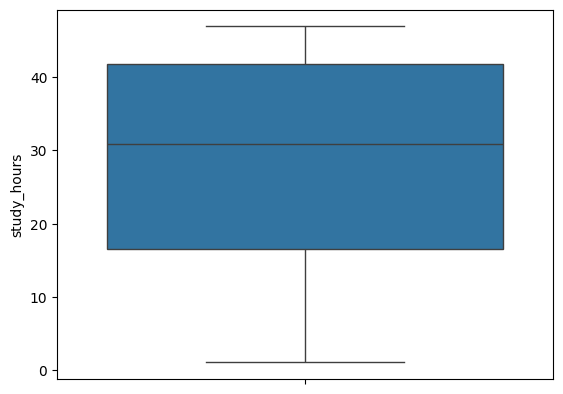

In [7]:
# Verify if we have outliers
sns.boxplot(df_scores, y='study_hours')

<Axes: ylabel='score'>

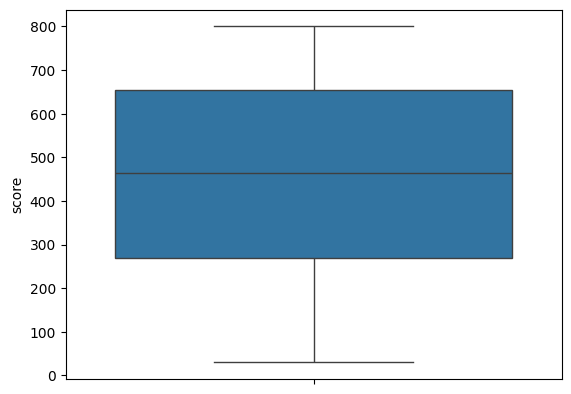

In [8]:
# Verify if we have outliers
sns.boxplot(df_scores, y='score')
# conclusion, no outliers present

<Axes: >

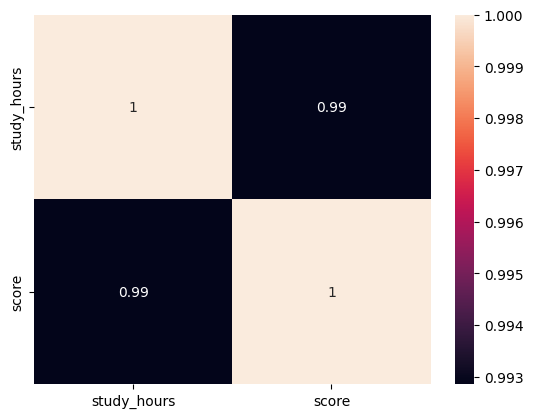

In [9]:
# Verify correlation bettwen variables (Pearson method)
sns.heatmap(df_scores.corr('pearson'), annot=True)

<Axes: >

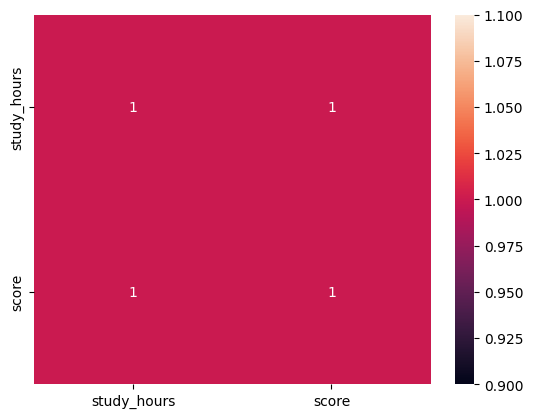

In [10]:
# Verify correlation bettwen variables (Spearman method)
sns.heatmap(df_scores.corr('spearman'), annot=True)

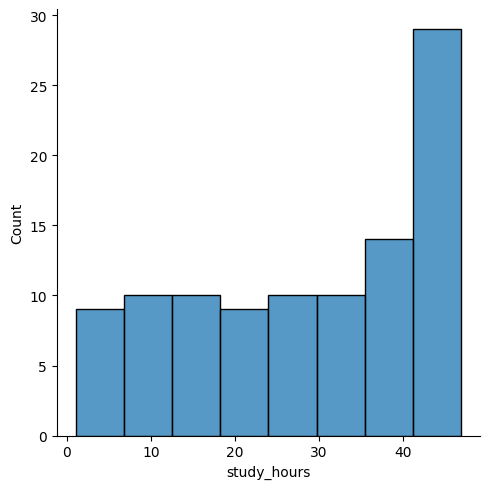

In [11]:
# Historigram
sns.displot(df_scores, x='study_hours')
# closer to the 40 hours we got a high number of data, it is exactly the point where it would scape of the straight

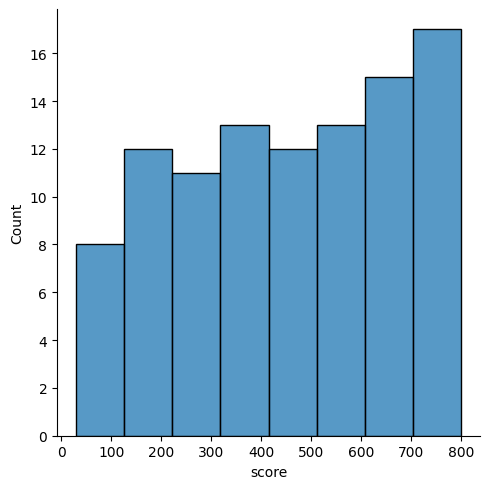

In [12]:
# Historigram
sns.displot(df_scores, x='score')
# we do not see a high diference betwen values

## Train model

In [14]:
# 1. Divide dataset betwen test and train
# When we have just a feature, we need to adjust the shape
X = df_scores['study_hours'].values.reshape(-1, 1)
y = df_scores['score'].values.reshape(-1, 1)

#X -> receive independent variables of test and train
#X -> receive dependent variables of test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [15]:
# 2. Instantiate model to be trained
reg_model = LinearRegression()

In [16]:
# 3. Train model
# fit -> takes the train dataset and train the model based on it
reg_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# What would be the line that represents the model just trained
# y = aX + b
print("Line equation: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

Line equation: y = 15.642619x + 8.476601
